# Assignment 2
## Linear Regression
Analysing housing data in Sacramento, CA, and predicting house prices.

### 1) Importing required libraries

In [88]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

### 2) Import and analyse the housing data

#### Performing EDA (Exploratory Data Analysis) and having fun!

In [89]:
# Read CSV
data = pd.read_csv("data.csv")

Getting the dimensions of the array.

In [6]:
# print the shape of the array

## write your code and run the cell

data.shape

(985, 12)

In [7]:
# DO NOT CHANGE, JUST RUN THE CELL
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


Making sure if we imported the right dataset by looking at the first five entries.

In [8]:
# Head

## print the data head

## write your code and run the cell

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Making sure if we imported the right dataset by looking at the last five entries.

In [9]:
# Tail

## print the data tail

## write your code and run the cell

data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


Making sure that there are no null values.

In [10]:
# DO NOT CHANGE, JUST RUN THE CELL
# Check Null Values
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

Measures of change and central tendency.

In [11]:
# DO NOT CHANGE, JUST RUN THE CELL
data.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


Perfect! everything looks good.

### 3) Predict Price

Our goal is to predict the price given new information about a house in the area covered by the data.

#### List all possible variables which might be a Predictor variable.

In [ ]:
# ANSWER

## COMMENT YOUR ANSWER HERE (CHOOSE ATLEAST 3 DIFFERENT PREDICTOR VARIABLES)

#city, sq_ft, beds 

#### Setting the target variable

In [19]:
# DO NOT CHANGE, JUST RUN THE CELL
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    plt.show();

In [17]:
# Target Variable - SET THE TARGET VARIABLE TO PRICE VALUES FROM 'data'
Y = data['price']

In [26]:
# Predictor Variable - SET THE PREDICTOR VARIBLE TO ONE OF YOUR CHOICES OF PREDICTOR VARIABLES
X = data['beds']

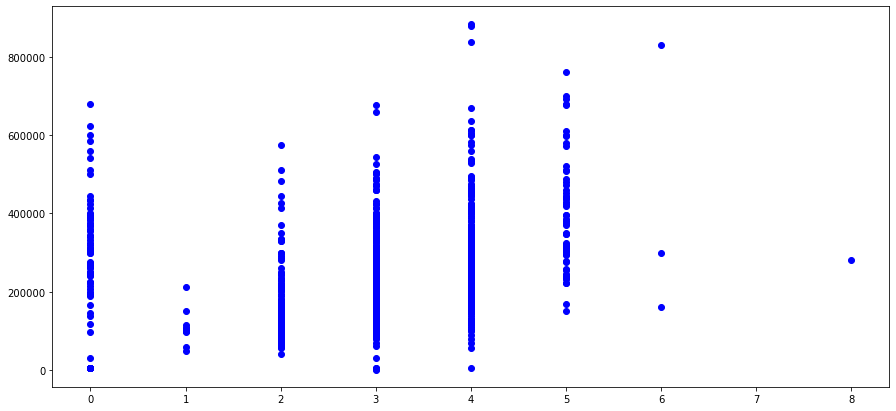

In [27]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_scatter_plot(X, Y)

In [22]:
# Predictor Variable - SET A SECOND PREDICTOR VARIABLE
X = data['sq__ft']

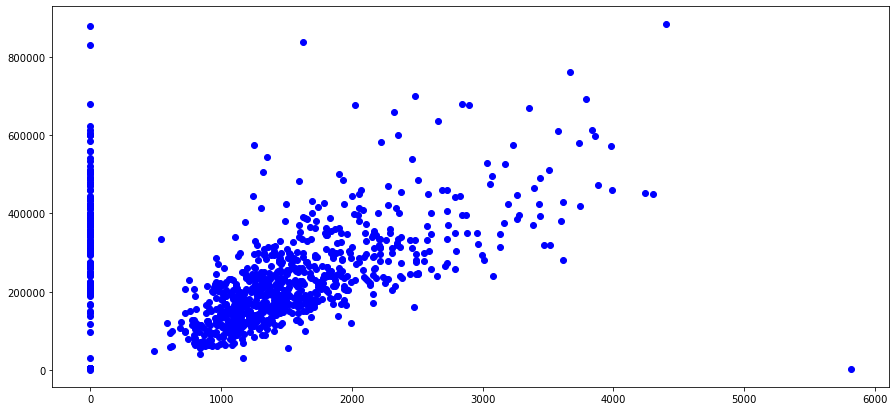

In [23]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_scatter_plot(X, Y)

In [28]:
# Predictor Variable - SET A THIRD PREDICTOR VARIABLE
X = data['city']

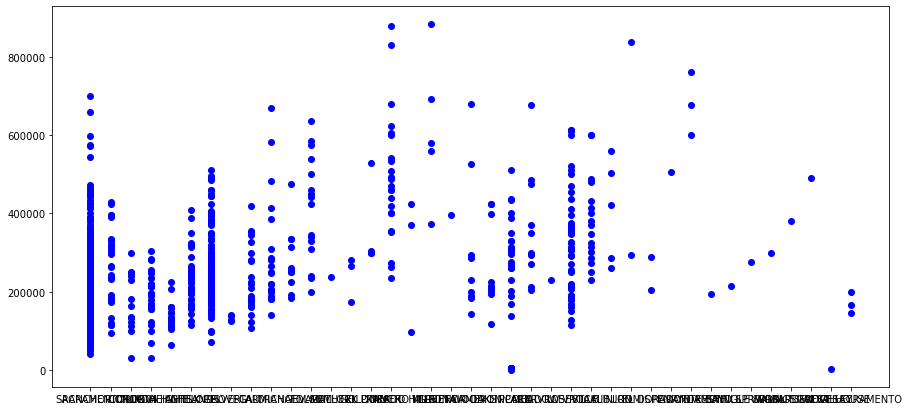

In [29]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_scatter_plot(X, Y)

In [ ]:
# Out of the three what do you think is the best predictor of price?

## sq_feet because is is scattered around many different values, 
## or in other words has a significant correlation with price

#I agree with sq_feet because it has a heavy positive correlation with price
#and the data gathers around a general line of best fit 

#### Finding the best linear fit for the data to predict price.

In [1]:
# Why does calculating mean won't work?

## Enter your reasoning, why mean or anyother singular measure of central tendency won't work here.
##
##Mean isn't a good representation of all the data points in a predictor variable and neglects certain data
#that is vital in a linear regression model. The mean for sq_ft would also be inaccurate considering that it graphed "homes"
#with 0 square feet at various prices when they don't exist. 

###### Let's analyse the Mean further.
Considering the easiest prediction of price: Mean.

We have a number of houses, the easiest value to estimate the value of a new house in the area will be the mean.

In [36]:
# Mean of price - FILL IN THE MISSING VALUE IN THE CODE TO CALCULATE THE MEAN OF PRICE
data['meanValues'] = data['price'].mean()

In [40]:
# DO NOT CHANGE, JUST RUN THE CELL
X = data['sq__ft'] # lets consider the sq__ft values for a moment
Y = data['price']
meanValues = data['meanValues']

In [41]:
# DO NOT CHANGE, JUST RUN THE CELL
def draw_plot(X, Y, Yhat):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');
    plt.show();

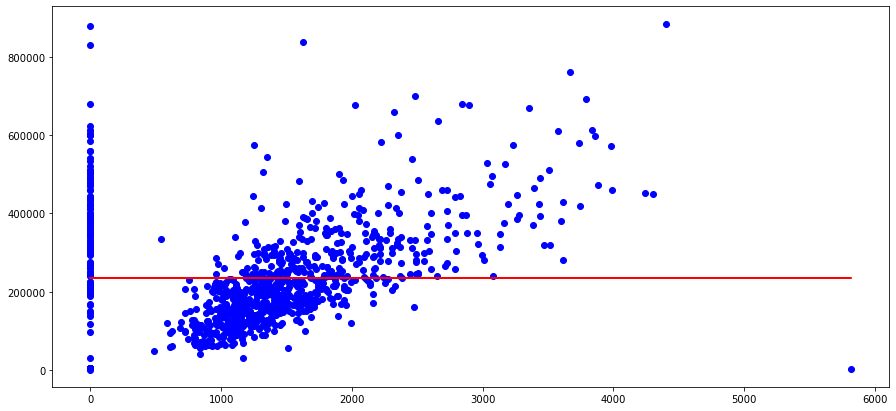

In [42]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_plot(X, Y, meanValues)

In [ ]:
# WHAT DO YOU THINK IS WRONG WITH THE GRAPH ABOVE?

## Type your analysis here.

#We took the mean of price which is one singular, constant value. it doesn't track slope and thus, the best fit line
#connecting the various data points. 



#### Calculating the residuals.

Residual is basically the difference between the actual value and the predicted value. Therefore, the lesser the residual, the better the prediction.

In [44]:
# ANSWER - Calculating the mean of the residual values - COMPLETE THE CODE TO CALCULATE THE RESIDUAL 
# BETWEEN THE PRICES AND MEAN
residual = abs(data['price'] - data['meanValues']).mean()
residual

103452.16956891476

But this is bad, why?

Because, only by looking at the data we can say that the price increases as the sq__ft values increase. But, the mean 
value suggests that hte price remains the same with any value of the sq__ft. Plus, the average residual value is too high.

What is a better way?

#### Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

#### Defining X and Y.

>>>>>X1

In [46]:
# Predictor Variable - SET THE PREDICTOR VARIBLE (X1) TO ONE OF YOUR CHOICES OF PREDICTOR VARIABLES
X1 = data['sq__ft']
Y = data['price']

#### Calculating beta1.

In [47]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    beta_1 = n/d
    return beta_1

In [48]:
# Complete the code to calculate the beta1 for X1
beta1 = calculatebeta1(X1, Y)
beta1

54.158639688530755

#### Calculating beta0.

In [49]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta0(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    beta0 = Ybar - calculatebeta1(X, Y) * Xbar
    return beta0

In [50]:
# Complete the code to calculate the beta0 for X1
beta0 = calculatebeta0(X1, Y)
beta0

162930.16140699777

#### Find the predicted values predictedValues.

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [51]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatePredictions(x, b0, b1):
    return b0 + b1 * x

In [52]:
# Complete the code to calculate the predictions of values in X1
predictedValues1 = calculatePredictions(X1, beta0, beta1)
predictedValues1

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

#### Calculating the residuals.

In [53]:
# Complete the code to calculate the residual for X1
residual = abs(data['price'] - (predictedValues1)).mean()
residual

95860.14770214104

#### Plot of predicted values

The red line in the plot below shows the regression line calculated by the linear regression algorithm above.

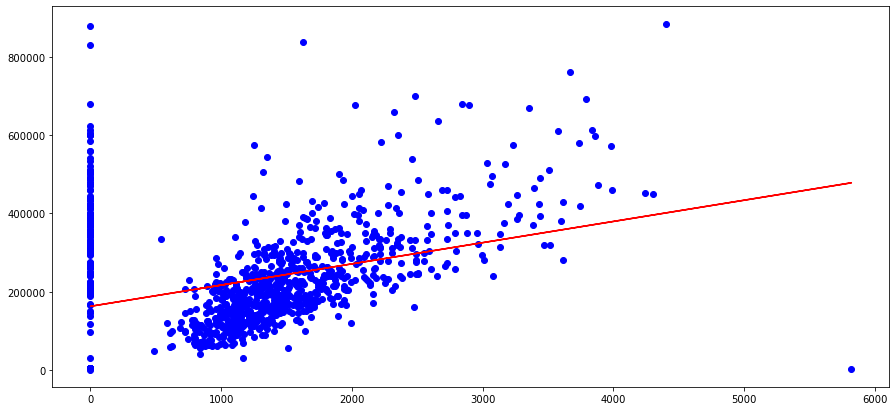

In [54]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_plot(X1, Y, predictedValues1)

>>>>>X2

In [55]:
# Predictor Variable - SET THE PREDICTOR VARIBLE (X2) TO ANOTHER OF YOUR CHOICES OF PREDICTOR VARIABLES
X2 = data['beds']
Y = data['price']

#### Calculating beta1.

In [56]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    beta_1 = n/d
    return beta_1

In [57]:
# Complete the code to calculate the beta1 for X2
beta1 = calculatebeta1(X2, Y)
beta1

36182.6439689373

#### Calculating beta0.

In [ ]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta0(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    beta0 = Ybar - calculatebeta1(X, Y) * Xbar
    return beta0

In [58]:
# Complete the code to calculate the beta0 for X2
beta0 = calculatebeta0(X2, Y)
beta0

128792.15948942926

#### Find the predicted values predictedValues.

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [59]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatePredictions(x, b0, b1):
    return b0 + b1 * x

In [60]:
# Complete the code to calculate the predictions of values in X2
predictedValues2 = calculatePredictions(X2, beta0, beta1)
predictedValues2

0      201157.447427
1      237340.091396
2      201157.447427
3      201157.447427
4      201157.447427
           ...      
980    273522.735365
981    237340.091396
982    237340.091396
983    273522.735365
984    237340.091396
Name: beds, Length: 985, dtype: float64

#### Calculating the residuals.

In [61]:
# Complete the code to calculate the residual for X2
residual = abs(data['price'] - (predictedValues2)).mean()
residual

98331.99531335253

#### Plot of predicted values

The red line in the plot below shows the regression line calculated by the linear regression algorithm above.

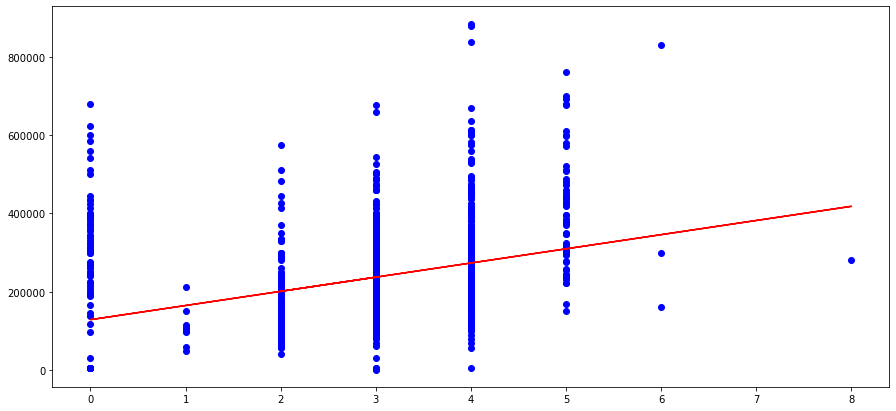

In [62]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_plot(X2, Y, predictedValues2)

>>>>>X3

In [74]:
# Predictor Variable - SET THE PREDICTOR VARIBLE (X3) TO ANOTHER OF YOUR CHOICES OF PREDICTOR VARIABLES
X3 = data['baths']
Y = data['price']

#### Calculating beta1.

In [75]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar))
    beta_1 = n/d
    return beta_1

In [76]:
# Complete the code to calculate the beta1 for X3
beta1 = calculatebeta1(X3, Y)
beta1

64318.535236734744

#### Calculating beta0.

In [77]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta0 = Ybar - calculatebeta1(X, Y) * Xbar
    
    return beta0

In [78]:
# Complete the code to calculate the beta0 for X3
beta0 = calculatebeta0(X3, Y)
beta0

119872.75465554741

#### Find the predicted values predictedValues.

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [79]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatePredictions(x, b0, b1):
    return b0 + b1 * x

In [81]:
# Complete the code to calculate the predictions of values in X3
predictedValues3 = calculatePredictions(X3, beta0, beta1)
predictedValues3

0      184191.289892
1      184191.289892
2      184191.289892
3      184191.289892
4      184191.289892
           ...      
980    312828.360366
981    248509.825129
982    248509.825129
983    248509.825129
984    248509.825129
Name: baths, Length: 985, dtype: float64

#### Calculating the residuals.

In [82]:
# Complete the code to calculate the residual for X3
residual = abs(data['price'] - (predictedValues3)).mean()
residual

94798.76435905808

#### Plot of predicted values

The red line in the plot below shows the regression line calculated by the linear regression algorithm above.

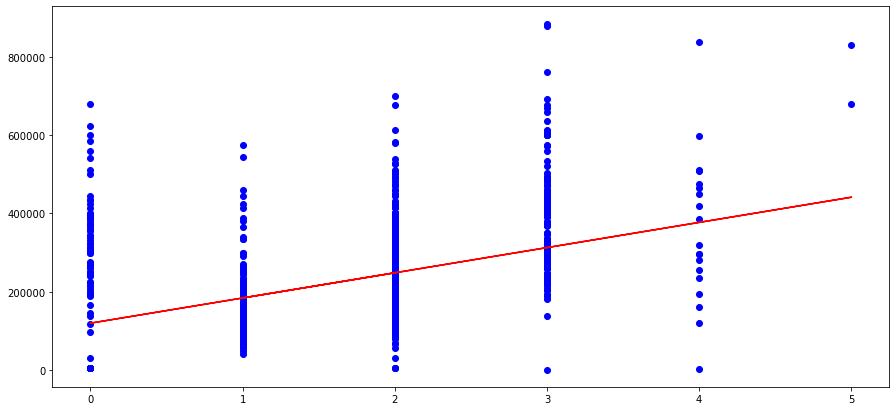

In [83]:
# DO NOT CHANGE, JUST RUN THE CELL
draw_plot(X3, Y, predictedValues3)

**Based on the three residual values which predictor provides the best predictions, X1, X2 or X3? Explain.**

In [ ]:
#**Write your answers here.**

#X1 since there is high correlation between sq_ft and price and the residuals for the best fit line is lower
#than the other predictor variables

### 4) Predict price for a new house

For the given information:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**make a prediction for the house details given.**

In [85]:
x = X1

In [86]:
beta1 = 54.158639688530755
beta0 = 162930.16140699777
X1 = 1204
ypredicted = calculatePredictions(X1, beta0, beta1)

In [87]:
print(ypredicted)

228137.1635919888
